#### 1.Feature Engineering
- importing libraries
- loading dataset
- dropping irrelevant columns

#### 1.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#### 1.2 Loading dataste

In [2]:
df = pd.read_csv('data/urban.csv')

#### 1.3 Dropping columns

In [3]:
df = df.drop(columns=
                    [
                    'datetime', 'sunrise', 'sunset', 
                    'preciptype', 'snowdepth', 'stations', 
                    'Condition_Code', 'conditions' ,
                    'description', 'icon', 'source', 
                    'City', 'Season', 'Day_of_Week',
                    'sunriseEpoch','sunsetEpoch','datetimeEpoch',
                    'temp', 'feelslikemax','feelslikemin','feelslike',
                    'precip','precipprob','precipcover','snow',
                    'winddir','pressure','cloudcover','visibility',
                    'solarradiation','solarenergy','severerisk',
                    'moonphase','Month','Is_Weekend','tempmin',
                    'Temp_Range','uvindex'
                    ]
            )

In [4]:
df.head()

,tempmax,dew,humidity,windgust,windspeed,Heat_Index,Severity_Score,Health_Risk_Score
0,106.1,51.5,21.0,26.3,13.7,95.918703,4.4300,10.522170
1,103.9,48.7,21.5,20.8,12.8,92.281316,3.8800,10.062332
2,105.0,41.7,16.9,18.3,10.3,90.599165,3.6300,9.673387
3,106.1,39.1,15.7,10.5,5.4,89.638811,2.8512,9.411519
4,106.1,40.1,15.9,15.9,8.1,89.760414,3.3908,9.515179


#### 2.Model Training
- importing libraries
- dropping the target column
- Preprocessing using ColumnTransformer
- Train_Test split
- Model Selection and Training
- Hyper Parameter Tuning
- Plotting y_pred and y_test

#### 2.1 Importing Libraries

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings


#### 2.2 Dropping the Target Column

In [6]:
X = df.drop(columns=['Health_Risk_Score'],axis=1)
X.head()

,tempmax,dew,humidity,windgust,windspeed,Heat_Index,Severity_Score
0,106.1,51.5,21.0,26.3,13.7,95.918703,4.4300
1,103.9,48.7,21.5,20.8,12.8,92.281316,3.8800
2,105.0,41.7,16.9,18.3,10.3,90.599165,3.6300
3,106.1,39.1,15.7,10.5,5.4,89.638811,2.8512
4,106.1,40.1,15.9,15.9,8.1,89.760414,3.3908


In [7]:
Y = df['Health_Risk_Score']
Y

0      10.522170
1      10.062332
2       9.673387
3       9.411519
4       9.515179
         ...    
995     8.750142
996     9.118198
997     9.880093
998     9.561602
999    10.978044
Name: Health_Risk_Score, Length: 1000, dtype: float64

#### Prerprocessing using Column Transformer

In [8]:
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

# Define the numerical transformer pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=5)),  # Impute missing values with KNNImputer
    ("scaler", StandardScaler())  # Scale features
])

# Define the categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),# Impute missing values with the most frequent value
    ("onehot", OneHotEncoder())  # Encode categorical features
])

# Combine numerical and categorical pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 7)

#### 2.3 Train_Test split

In [11]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### 2.4 Model Selection and Training

In [12]:
def evaluate_clfs(true, predicted):
    mae = mean_absolute_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [14]:
def evaluate_models(X, Y, models):
    model_list = []
    r2_list =[]

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

    # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
        model_train_mae , model_train_r2 = evaluate_clfs(y_train, y_train_pred)

        model_test_mae , model_test_r2 = evaluate_clfs(y_test, y_test_pred)

    
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
    
        print('Model performance for Training set')
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
    
        print('Model performance for Test set')
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
    return report

In [15]:
base_model_report =evaluate_models(X, Y, models=models)

Linear Regression
Model performance for Training set
- Mean Absolute Error: 0.0977
- R2 Score: 0.9665
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.1000
- R2 Score: 0.9571


Lasso
Model performance for Training set
- Mean Absolute Error: 0.5830
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.5487
- R2 Score: -0.0247


Ridge
Model performance for Training set
- Mean Absolute Error: 0.0978
- R2 Score: 0.9664
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0994
- R2 Score: 0.9575


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 0.0482
- R2 Score: 0.9912
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0656
- R2 Score: 0.9792


Decision Tree
Model performance for Training set
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model perf

Random Forest Regressor
Model performance for Training set
- Mean Absolute Error: 0.0287
- R2 Score: 0.9965
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0850
- R2 Score: 0.9614


XGBRegressor
Model performance for Training set
- Mean Absolute Error: 0.0044
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0890
- R2 Score: 0.9609


CatBoosting Regressor
Model performance for Training set
- Mean Absolute Error: 0.0302
- R2 Score: 0.9970
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0754
- R2 Score: 0.9758


AdaBoost Regressor
Model performance for Training set
- Mean Absolute Error: 0.1573
- R2 Score: 0.9237
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.1687
- R2 Score: 0.8923




In [16]:
base_model_report

,Model Name,R2_Score
3,K-Neighbors Regressor,0.979232
7,CatBoosting Regressor,0.975838
5,Random Forest Regressor,0.961430
6,XGBRegressor,0.960919
2,Ridge,0.957476
0,Linear Regression,0.957112
4,Decision Tree,0.935218
8,AdaBoost Regressor,0.892342
1,Lasso,-0.024657


#### 2.5 Hyper Paramaeter Tuning

In [17]:
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

catboost_params = {
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

In [18]:
randomcv_models = [
    ('XGBoost', XGBRegressor(), xgboost_params),
    ("CATBOOST", CatBoostRegressor(), catboost_params),
    ("KNN", KNeighborsRegressor(), knn_params),
    ('Random_Forest',RandomForestRegressor(),rf_params)
]

In [19]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, Y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\KIIT\anaconda3\envs\bani\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\KIIT\anaconda3\envs\bani\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.6260770	total: 10.9ms	remaining: 1.08s
1:	learn: 0.5775865	total: 20.3ms	remaining: 995ms
2:	learn: 0.5357039	total: 31.5ms	remaining: 1.02s
3:	learn: 0.4951693	total: 46.8ms	remaining: 1.12s
4:	learn: 0.4593733	total: 63.3ms	remaining: 1.2s
5:	learn: 0.4257785	total: 79.9ms	remaining: 1.25s
6:	learn: 0.3959060	total: 92.4ms	remaining: 1.23s
7:	learn: 0.3672247	total: 104ms	remaining: 1.19s
8:	learn: 0.3436133	total: 116ms	remaining: 1.18s
9:	learn: 0.3193721	total: 130ms	remaining: 1.17s
10:	learn: 0.2980873	total: 147ms	remaining: 1.19s
11:	learn: 0.2789815	total: 164ms	remaining: 1.2s
12:	learn: 0.2616962	total: 181ms	remaining: 1.21s
13:	learn: 0.2460859	total: 198ms	remaining: 1.21s
14:	learn: 0.2320963	total: 215ms	remaining: 1.22s
15:	learn: 0.2195374	total: 228ms	remaining: 1.2s
16:	learn: 0.2074217	total: 245ms	remaining: 1.2s
17:	learn: 0.1967373	total: 263ms	remaining: 1.2s
18:	learn: 0.1870918	total: 2

c:\Users\KIIT\anaconda3\envs\bani\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\KIIT\anaconda3\envs\bani\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 5, 'max_depth': 5}
---------------- Best Params for CATBOOST -------------------
{'learning_rate': 0.1, 'iterations': 100, 'depth': 8}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}
---------------- Best Params for Random_Forest -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}


In [20]:
model_param

{'XGBoost': {'min_child_weight': 5, 'max_depth': 5},
 'CATBOOST': {'learning_rate': 0.1, 'iterations': 100, 'depth': 8},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'},
 'Random_Forest': {'n_estimators': 200,
  'max_features': 'sqrt',
  'max_depth': 20}}

from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "CatboostRegressor": CatBoostRegressor(**model_param['CATBOOST']),
    "KNeighborsRegressor": KNeighborsRegressor(**model_param['KNN']),
    "XGBClassifier": XGBRegressor(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X, Y, models=best_models)

In [21]:
best_models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['Random_Forest']),
    "KNeighborsRegressor": KNeighborsRegressor(**model_param['KNN']),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'],n_jobs=-1),
    "CatBoostRegressor":CatBoostRegressor(**model_param['CATBOOST'])
}
tuned_report =evaluate_models(X, Y, models=best_models)

Random Forest Regressor
Model performance for Training set
- Mean Absolute Error: 0.0277
- R2 Score: 0.9971
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0769
- R2 Score: 0.9736


KNeighborsRegressor
Model performance for Training set
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0578
- R2 Score: 0.9860


XGBRegressor
Model performance for Training set
- Mean Absolute Error: 0.0161
- R2 Score: 0.9991
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0855
- R2 Score: 0.9632


0:	learn: 0.6358081	total: 9.45ms	remaining: 936ms
1:	learn: 0.5873766	total: 18.4ms	remaining: 900ms
2:	learn: 0.5449512	total: 26.5ms	remaining: 858ms
3:	learn: 0.5064110	total: 36.5ms	remaining: 877ms
4:	learn: 0.4713236	total: 45.6ms	remaining: 866ms
5:	learn: 0.4376986	total: 53.4ms	remaining: 836ms
6:	learn: 0.4070442	total: 61.6ms	

In [22]:
tuned_report

,Model Name,R2_Score
1,KNeighborsRegressor,0.986010
3,CatBoostRegressor,0.974264
0,Random Forest Regressor,0.973571
2,XGBRegressor,0.963206


In [23]:
best_model = KNeighborsRegressor(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.60


#### 2.6 Plotting y-Pred and y_test

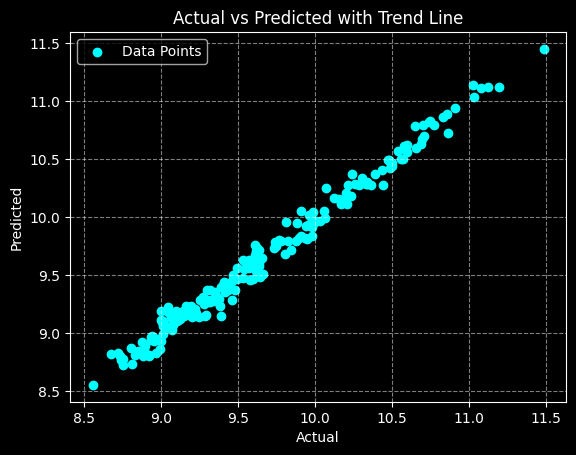

In [24]:
plt.style.use('dark_background')

plt.scatter(y_test, y_pred, c='cyan', label='Data Points') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with Trend Line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


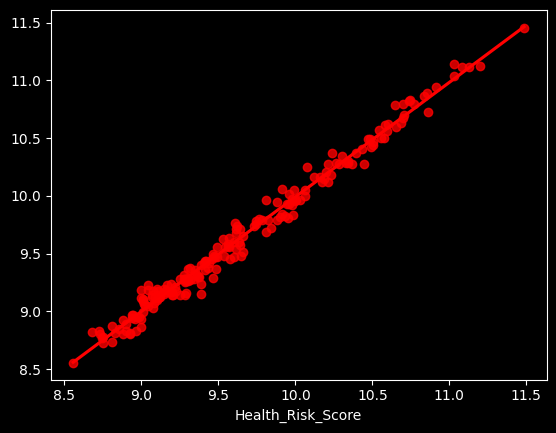

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');